<a href="https://colab.research.google.com/github/RatnakalaArigela/FMML-LAB1/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

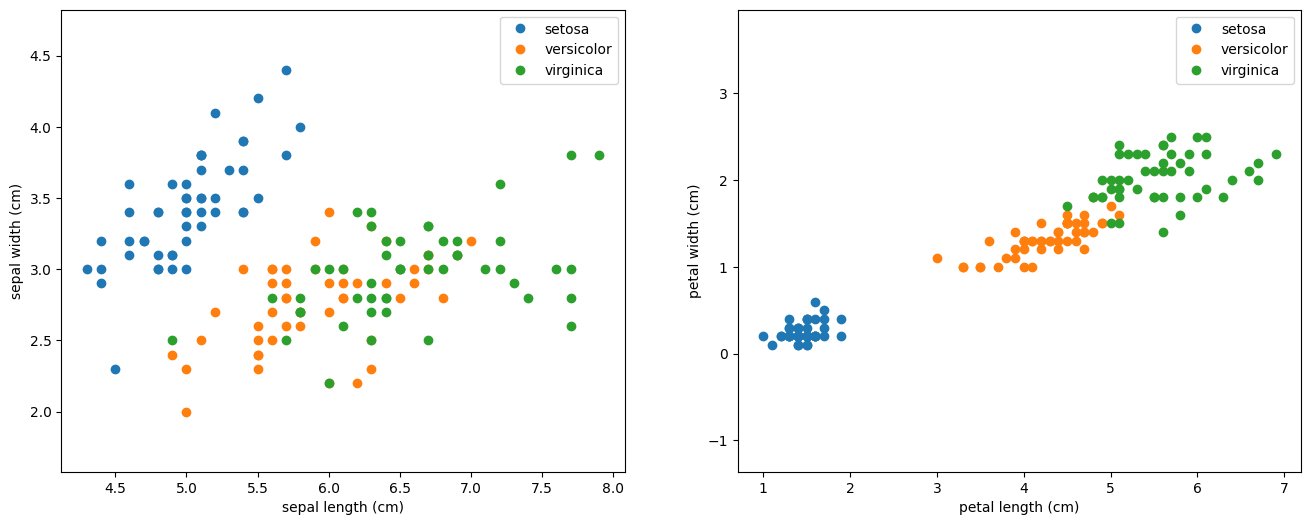

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 107.29it/s]


# Plot training progress

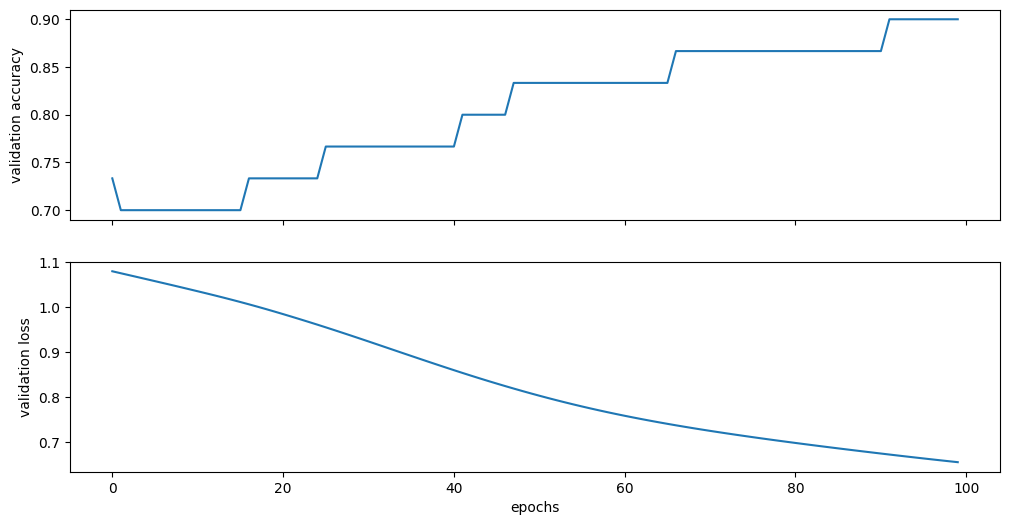

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

# 1) ANSWER
from sklearn.neural_network import MLPClassifier

# Define the inputs and corresponding outputs for different logic gates
# Example: For AND gate
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Example: For OR gate
X_or = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_or = [0, 1, 1, 1]

# Example: For NOR gate
X_nor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_nor = [1, 0, 0, 0]

# Create MLP classifiers for different logic gates
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000)
mlp_or = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000)
mlp_nor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000)

# Train the classifiers
mlp_and.fit(X_and, y_and)
mlp_or.fit(X_or, y_or)
mlp_nor.fit(X_nor, y_nor)

# Test the classifiers
test_cases = [[0, 0], [0, 1], [1, 0], [1, 1]]
print("AND Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_and.predict([test_case])[0])

print("\nOR Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_or.predict([test_case])[0])

print("\nNOR Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_nor.predict([test_case])[0])



# 2) ANSWER

Changing the logic from 0/1 to -1/+1 involves adjusting the input and output values accordingly. This affects the way the perceptrons in Single-Layer Perceptron (SLP) and Multi-Layer Perceptron (MLP) models learn and make predictions.



*Single-Layer Perceptron (SLP):*

In a single-layer perceptron, the decision boundary is a hyperplane that separates the input space into two classes. Changing the logic values from 0/1 to -1/+1 would affect the weights and biases learned by the perceptron.

With the change to -1/+1 logic:

The weights would be adjusted accordingly to accommodate the new input range.
The bias term would also be adjusted to ensure that the decision boundary still correctly separates the classes.
However, the basic structure of a single-layer perceptron remains the same, and it can still learn linear decision boundaries. So, if the problem remains linearly separable, the single-layer perceptron should be able to learn and make predictions effectively.

*Multi-Layer Perceptron (MLP):*

The impact of changing the logic from 0/1 to -1/+1 on an MLP would be similar to that on an SLP, with additional complexity introduced by the presence of hidden layers and non-linear activation functions.

Weights and biases throughout the network would need to be adjusted to accommodate the new input and output ranges.
Activation functions such as ReLU, sigmoid, or tanh would also need to be considered, as they might saturate or not respond optimally to the new input range.
An MLP, with its ability to learn non-linear decision boundaries, might be more robust in handling the change from 0/1 to -1/+1 logic compared to an SLP. It can learn more complex mappings between inputs and outputs, potentially making it more adaptable to various input/output representations.

In summary, while both SLPs and MLPs can adapt to the change from 0/1 to -1/+1 logic, the MLP's flexibility in learning non-linear mappings may make it better suited for handling such changes, especially in more complex scenarios.

# 3a) ANSWER

from sklearn.neural_network import MLPClassifier

# Define the inputs and corresponding outputs for different logic gates
# OR gate
X_or = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_or = [0, 1, 1, 1]

# AND gate
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# NOR gate
X_nor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_nor = [1, 0, 0, 0]

# Create MLP classifiers for different logic gates
mlp_or = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='adam', max_iter=1000)
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='adam', max_iter=1000)
mlp_nor = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='adam', max_iter=1000)

# Train the classifiers
mlp_or.fit(X_or, y_or)
mlp_and.fit(X_and, y_and)
mlp_nor.fit(X_nor, y_nor)

# Test the classifiers
test_cases = [[0, 0], [0, 1], [1, 0], [1, 1]]

print("OR Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_or.predict([test_case])[0])

print("\nAND Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_and.predict([test_case])[0])

print("\nNOR Gate:")
for test_case in test_cases:
    print(test_case, "->", mlp_nor.predict([test_case])[0])










# 3b) ANSWER


The choice of activation function in a neural network model architecture depends on several factors, including the nature of the problem, the characteristics of the data, and the desired properties of the model. Here's a brief overview of some common activation functions and when they are typically used:

Sigmoid (Logistic) Activation Function:

Range: (0, 1)

Properties: Smooth, differentiable, squashes input to a probability-like value.

Commonly used in the output layer of binary classification problems where the output needs to be interpreted as a probability. Also used in hidden layers of shallow networks (less common in deep networks due to vanishing gradient problem). Hyperbolic Tangent (Tanh) Activation Function:

Range: (-1, 1)

Properties: Similar to sigmoid but centered at 0, avoids the output shift problem of sigmoid.

Used in hidden layers of shallow networks and sometimes in recurrent neural networks (RNNs).

Rectified Linear Unit (ReLU) Activation Function:

Range: [0, ∞)

Properties: Piecewise linear, simple and computationally efficient, avoids vanishing gradient problem.

Widely used in hidden layers of deep neural networks due to its effectiveness in training deep models.

Identity Activation Function:

Range: (-∞, ∞)

Properties: Passes the input through unchanged, effectively making the neuron linear.

Often used in regression problems where the output range is not bounded.

Softmax Activation Function:

Range: [0, 1] (for each output neuron, the sum of all outputs is 1)

Properties: Generalization of the sigmoid function for multi-class classification problems.

Used in the output layer of multi-class classification problems, providing a probability distribution over the classes.

The choice of activation function depends on factors such as the desired output behavior, the potential for gradient vanishing/exploding, and computational considerations. It's often a matter of experimentation and tuning to determine the most suitable activation function for a given task.